# Phase 1



In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier







# Part 1: Data Exploration and Preprocessing


## Step 1: Load and Explore the Dataset
### 1.1 Load the Dataset


In [ ]:
# from Jupyter Labs
df_oring = pd.read_csv("customer_purchase_data.csv")
df_oring

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [4]:
df_oring = pd.read_csv("customer_purchase_data.csv")
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


### 1.2 Understand the Structure of the Dataset

In [5]:
# Remove all decimal points up in columns AnnualIncome and TimeSpentOnWebsite
df_oring['AnnualIncome'] = df_oring['AnnualIncome'].astype(int)
df_oring['TimeSpentOnWebsite'] = df_oring['TimeSpentOnWebsite'].astype(int)
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


In [6]:
# View data types and missing values
print(df_oring.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1500 non-null   int64
 1   Gender              1500 non-null   int64
 2   AnnualIncome        1500 non-null   int64
 3   NumberOfPurchases   1500 non-null   int64
 4   ProductCategory     1500 non-null   int64
 5   TimeSpentOnWebsite  1500 non-null   int64
 6   LoyaltyProgram      1500 non-null   int64
 7   DiscountsAvailed    1500 non-null   int64
 8   PurchaseStatus      1500 non-null   int64
dtypes: int64(9)
memory usage: 105.6 KB
None


In [7]:
# Summary statistics
df_oring.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84248.666667,10.420000,2.012667,29.983333,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.487904,5.887391,1.428005,16.975016,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.250000,5.000000,1.000000,16.000000,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.000000,11.000000,2.000000,30.000000,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.000000,15.000000,3.000000,44.000000,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.000000,20.000000,4.000000,59.000000,1.000000,5.000000,1.00000


In [8]:
# Checking for missing values
print(df_oring.isnull().sum())


Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [9]:
# Save df_oring to google drive
df_oring.to_csv('customer_purchase_data.csv', index=False)


In [10]:
# Download df_oring to Google drive
from google.colab import files
files.download('customer_purchase_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Make a copy of df_oring
df = df_oring.copy()
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


## Step 2: Data Preprocessing

---



### 2.1 Encoding Categorical Variables


In [12]:
# Encode 'ProductCategory'
df = pd.get_dummies(df, columns=['ProductCategory'], drop_first=True)
df

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,40,1,66120,8,30,0,5,1,False,False,False,False
1,20,1,23579,4,38,0,5,0,False,True,False,False
2,27,1,127821,11,31,1,0,1,False,True,False,False
3,24,1,137798,19,46,0,4,1,False,False,True,False
4,31,1,99300,19,19,0,0,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,34,0,5,1,False,False,False,False
1496,67,1,28775,18,17,0,1,1,False,True,False,False
1497,40,1,57363,7,12,0,0,0,False,False,False,True
1498,63,0,134021,16,37,1,0,1,False,True,False,False


In [13]:
df.shape

(1500, 12)

In [14]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
ProductCategory_1     0
ProductCategory_2     0
ProductCategory_3     0
ProductCategory_4     0
dtype: int64


In [15]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84248.666667,10.420000,29.983333,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.487904,5.887391,16.975016,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.250000,5.000000,16.000000,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.000000,11.000000,30.000000,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.000000,15.000000,44.000000,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.000000,20.000000,59.000000,1.000000,5.000000,1.00000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1500 non-null   int64
 1   Gender              1500 non-null   int64
 2   AnnualIncome        1500 non-null   int64
 3   NumberOfPurchases   1500 non-null   int64
 4   TimeSpentOnWebsite  1500 non-null   int64
 5   LoyaltyProgram      1500 non-null   int64
 6   DiscountsAvailed    1500 non-null   int64
 7   PurchaseStatus      1500 non-null   int64
 8   ProductCategory_1   1500 non-null   bool 
 9   ProductCategory_2   1500 non-null   bool 
 10  ProductCategory_3   1500 non-null   bool 
 11  ProductCategory_4   1500 non-null   bool 
dtypes: bool(4), int64(8)
memory usage: 99.7 KB


In [17]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,40,1,66120,8,30,0,5,1,False,False,False,False
1,20,1,23579,4,38,0,5,0,False,True,False,False
2,27,1,127821,11,31,1,0,1,False,True,False,False
3,24,1,137798,19,46,0,4,1,False,False,True,False
4,31,1,99300,19,19,0,0,1,True,False,False,False


### 2.2 Feature Scaling
Scale numerical features to ensure that all features contribute equally to the model's performance.

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[['Age',	'AnnualIncome',	'NumberOfPurchases', 'TimeSpentOnWebsite',	'DiscountsAvailed']] = scaler.fit_transform(df[['Age',	'AnnualIncome',	'NumberOfPurchases', 'TimeSpentOnWebsite',	'DiscountsAvailed']])

# Display the scaled DataFrame
df


,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,-0.276761,1,-0.481928,-0.411185,0.000982,0,1.434172,1,False,False,False,False
1,-1.564418,1,-1.612828,-1.090830,0.472420,0,1.434172,0,False,True,False,False
2,-1.113738,1,1.158317,0.098548,0.059912,1,-1.499095,1,False,True,False,False
3,-1.306887,1,1.423543,1.457838,0.943858,0,0.847519,1,False,False,True,False
4,-0.856207,1,0.400121,1.457838,-0.647245,0,-1.499095,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.341143,1,-0.510426,0.438371,0.236701,0,1.434172,1,False,False,False,False
1496,1.461577,1,-1.474699,1.287927,-0.765105,0,-0.912442,1,False,True,False,False
1497,-0.276761,1,-0.714722,-0.581096,-1.059753,0,-1.499095,0,False,False,False,True
1498,1.204046,0,1.323136,0.948104,0.413490,1,-1.499095,1,False,True,False,False


### 2.3 Exploratory Data Analysis (EDA)

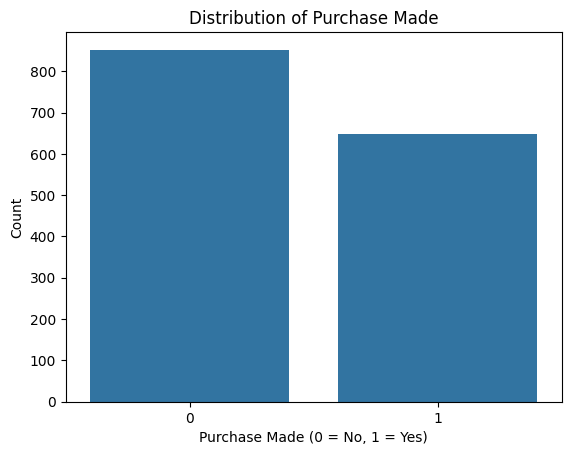

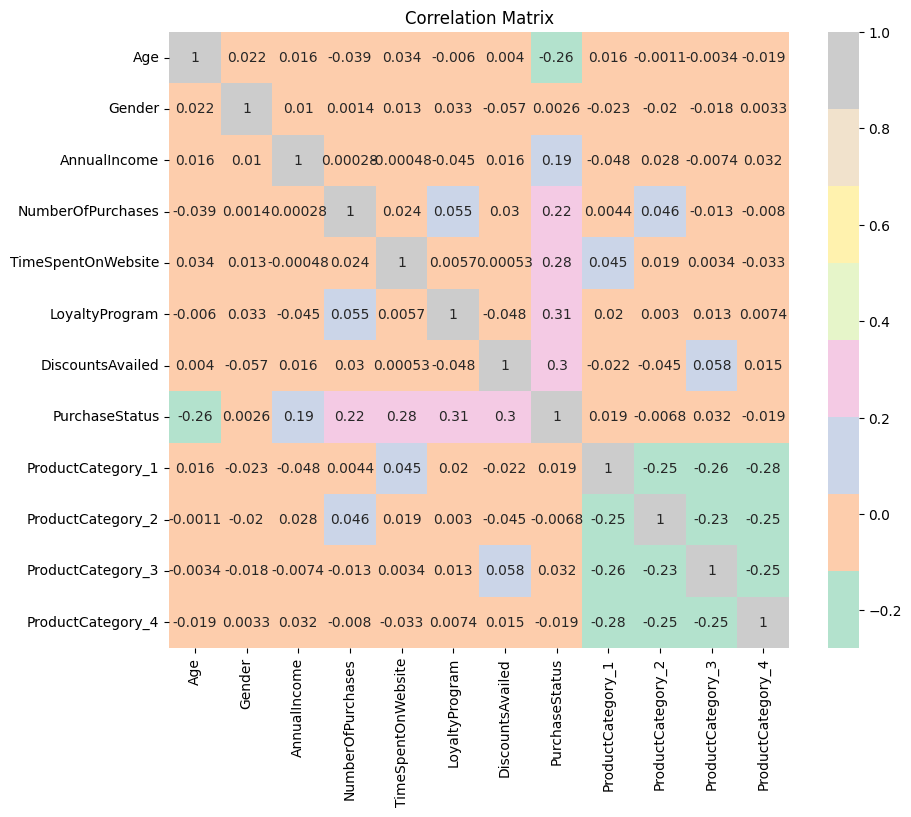

In [19]:
# Distribution of the target variable
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Distribution of Purchase Made')
plt.xlabel('Purchase Made (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Pastel2')
plt.title('Correlation Matrix')
plt.show()


# Part 2: Training, Testing, Implementing, Evaluating and Comparing


## Step 3: Splitting the Dataset
Split the data into training and testing sets to evaluate model performance on unseen data.

In [20]:
# Split data into features (X) and target (y)

X = df.drop(columns=["PurchaseStatus"], axis=1)
X

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,ProductCategory_1,ProductCategory_2,ProductCategory_3,ProductCategory_4
0,-0.276761,1,-0.481928,-0.411185,0.000982,0,1.434172,False,False,False,False
1,-1.564418,1,-1.612828,-1.090830,0.472420,0,1.434172,False,True,False,False
2,-1.113738,1,1.158317,0.098548,0.059912,1,-1.499095,False,True,False,False
3,-1.306887,1,1.423543,1.457838,0.943858,0,0.847519,False,False,True,False
4,-0.856207,1,0.400121,1.457838,-0.647245,0,-1.499095,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.341143,1,-0.510426,0.438371,0.236701,0,1.434172,False,False,False,False
1496,1.461577,1,-1.474699,1.287927,-0.765105,0,-0.912442,False,True,False,False
1497,-0.276761,1,-0.714722,-0.581096,-1.059753,0,-1.499095,False,False,False,True
1498,1.204046,0,1.323136,0.948104,0.413490,1,-1.499095,False,True,False,False


In [21]:
# Get the target column
y = df["PurchaseStatus"]
y

,PurchaseStatus
0,1
1,0
2,1
3,1
4,1
...,...
1495,1
1496,1
1497,0
1498,1


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1200, 11)
Testing set size: (300, 11)


## Step 4: Model Development

### 4.1 Logistic Regression

In [24]:
# Initialize the model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]


In [25]:
# Print the model training score and testing score
print("Logistic Regression Training Score:", logreg.score(X_train, y_train))
print("Logistic Regression Testing Score:", logreg.score(X_test, y_test))


Logistic Regression Training Score: 0.81
Logistic Regression Testing Score: 0.84


In [26]:
# print classification report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.73      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_logreg)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8254905523255813


### 4.2 Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)
y_pred_prob_tree = decision_tree.predict_proba(X_test)[:, 1]


In [59]:
# Print the training and testing scores
print("Decision Tree Training Score:", decision_tree.score(X_train, y_train))
print("Decision Tree Testing Score:", decision_tree.score(X_test, y_test))

Decision Tree Training Score: 0.9041666666666667
Decision Tree Testing Score: 0.9066666666666666


In [29]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy Score : {acc_score}")

Decision Tree Accuracy Score : 0.9066666666666666


### 4.3 Random Forest

In [30]:
# Initialize the model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]


In [31]:
# Print the model training score and testing score
print("Random Forest Training Score:", random_forest.score(X_train, y_train))
print("Random Forest Testing Score:", random_forest.score(X_test, y_test))


Random Forest Training Score: 1.0
Random Forest Testing Score: 0.95


## Step 5: Model Evaluation
Evaluate each model using various metrics to determine their performance.

### 5.1 Evaluation Metrics

Accuracy: Proportion of correct predictions.
Precision: Proportion of positive identifications that were actually correct.
Recall (Sensitivity): Proportion of actual positives that were identified correctly.
F1 Score: Harmonic mean of precision and recall.
ROC AUC: Area Under the Receiver Operating Characteristic Curve.


In [32]:
def evaluate_model(y_true, y_pred, y_pred_prob, model_name):
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_pred_prob):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, y_pred_prob_logreg, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, y_pred_prob_tree, "Decision Tree")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_pred_prob_rf, "Random Forest")


--- Logistic Regression Evaluation ---
Accuracy:  0.8400
Precision: 0.8774
Recall:    0.7266
F1 Score:  0.7949
ROC AUC:   0.8947

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       172
           1       0.88      0.73      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



--- Decision Tree Evaluation ---
Accuracy:  0.9067
Precision: 0.8906
Recall:    0.8906
F1 Score:  0.8906
ROC AUC:   0.9401

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       172
           1       0.89      0.89      0.89       128

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



--- Random Forest Evaluation ---
Accuracy:

### 5.2 Comparing Model Performance
Compare the evaluation metrics across different models to identify the best-performing one.

In [33]:
# Collecting metrics for comparison

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]
precision = [
    precision_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_tree),
    precision_score(y_test, y_pred_rf)
]
recall = [
    recall_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_rf)
]
f1 = [
    f1_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_tree),
    f1_score(y_test, y_pred_rf)
]
roc_auc = [
    roc_auc_score(y_test, y_pred_prob_logreg),
    roc_auc_score(y_test, y_pred_prob_tree),
    roc_auc_score(y_test, y_pred_prob_rf)
]

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
})

print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.840000   0.877358  0.726562  0.794872  0.894668
1        Decision Tree  0.906667   0.890625  0.890625  0.890625  0.940134
2        Random Forest  0.950000   0.982906  0.898438  0.938776  0.958031


# Part 3: Feature Importance, Interpretation, and Visualizations


# Step 6: Feature Importance and Interpretation
Understanding which features influence the model's predictions is crucial for actionable insights.

6.1 Logistic Regression Coefficients
In Logistic Regression, the coefficients indicate the relationship between each feature and the log-odds of the target variable.

In [34]:
# Get the coefficients
coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the odds ratios
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# Sort by absolute coefficient value
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient', 'Odds_Ratio']])


               Feature  Coefficient  Odds_Ratio
5       LoyaltyProgram     2.323040   10.206652
6     DiscountsAvailed     1.148849    3.154561
4   TimeSpentOnWebsite     1.022437    2.779961
0                  Age    -1.001615    0.367286
2         AnnualIncome     0.718716    2.051797
3    NumberOfPurchases     0.600305    1.822675
10   ProductCategory_4    -0.283959    0.752797
9    ProductCategory_3    -0.141238    0.868283
8    ProductCategory_2    -0.140275    0.869119
7    ProductCategory_1     0.116027    1.123026
1               Gender     0.035639    1.036281


### 6.2 Decision Tree Feature Importances
For Decision Trees and Random Forests, feature importance is derived from how much each feature contributes to reducing impurity.

In [35]:
# Feature importances from Decision Tree
importances_tree = decision_tree.feature_importances_
feat_names_tree = X_train.columns
feature_importance_tree = pd.Series(importances_tree, index=feat_names_tree).sort_values(ascending=False)

print("Decision Tree Feature Importances:")
print(feature_importance_tree)

Decision Tree Feature Importances:
TimeSpentOnWebsite    0.225926
Age                   0.196149
DiscountsAvailed      0.168575
LoyaltyProgram        0.159593
NumberOfPurchases     0.154990
AnnualIncome          0.093948
ProductCategory_2     0.000818
Gender                0.000000
ProductCategory_1     0.000000
ProductCategory_3     0.000000
ProductCategory_4     0.000000
dtype: float64


### 6.3 Random Forest Feature Importances
For Decision Trees and Random Forests, feature importance is derived from how much each feature contributes to reducing impurity.

In [36]:
# Feature importances from Random Forest
importances_rf = random_forest.feature_importances_
feat_names_rf = X_train.columns
feature_importance_rf = pd.Series(importances_rf, index=feat_names_rf).sort_values(ascending=False)

print("\nRandom Forest Feature Importances:")
print(feature_importance_rf)



Random Forest Feature Importances:
TimeSpentOnWebsite    0.193599
Age                   0.184661
AnnualIncome          0.162408
DiscountsAvailed      0.157537
NumberOfPurchases     0.141004
LoyaltyProgram        0.101260
Gender                0.016040
ProductCategory_4     0.011801
ProductCategory_1     0.010845
ProductCategory_2     0.010542
ProductCategory_3     0.010304
dtype: float64


## Step 7: Visualizing Feature Importances

### 7.1 Logistic Regression Coefficients Plot

<ipython-input-37-ded9a4e5f26b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='plasma')


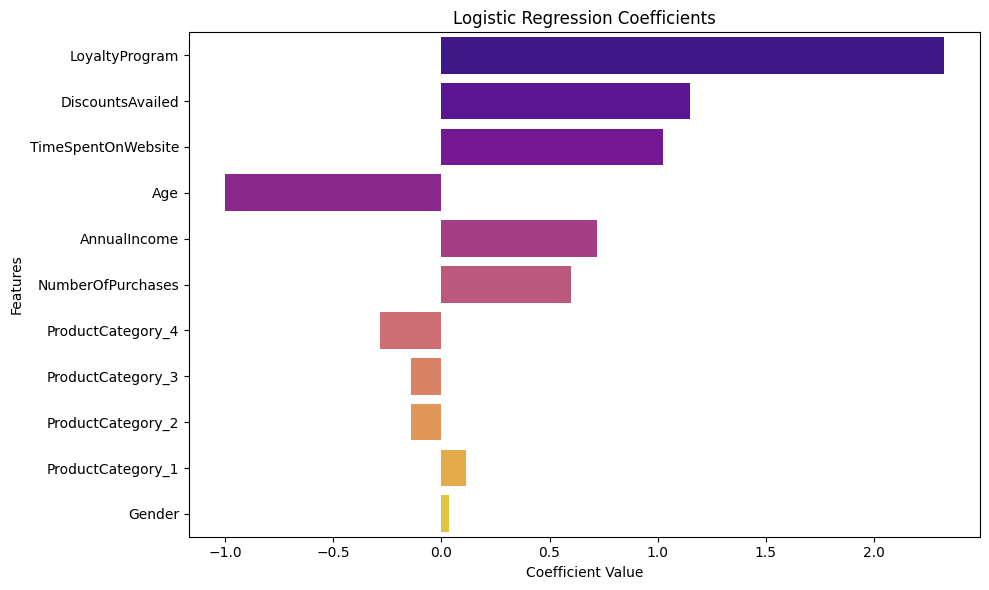

In [37]:
# Plot Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='plasma')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


### 7.2 Decision Tree Feature Importance Plot


<ipython-input-38-36892910d50a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='plasma')


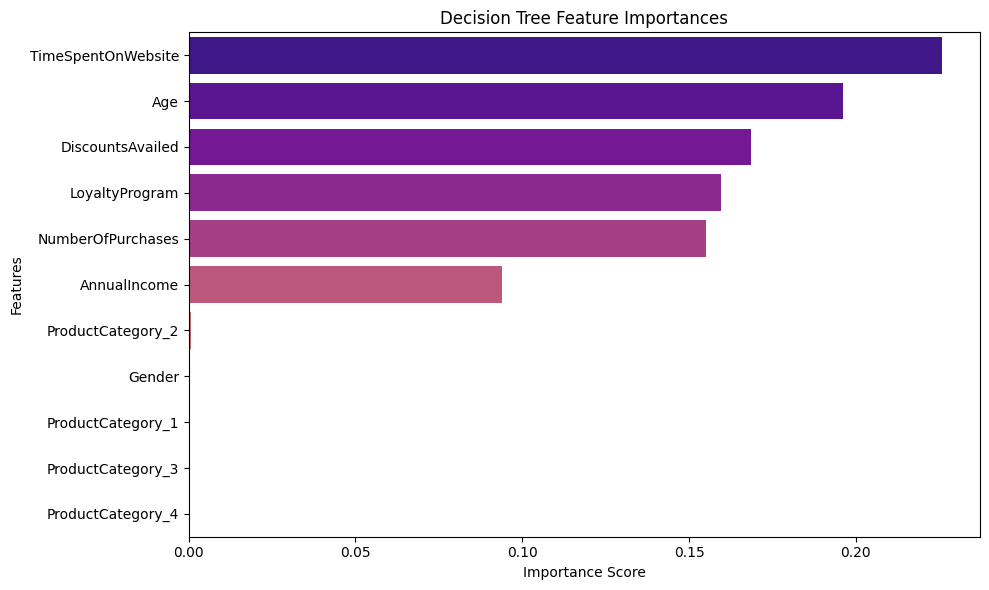

In [38]:
# Function to plot feature importances
def plot_feature_importances(importances, feature_names, model_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=feature_names, palette='plasma')
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Plot for Decision Tree
plot_feature_importances(feature_importance_tree, feature_importance_tree.index, 'Decision Tree')


### 7.3 Random Forest Feature Importance Plot


<ipython-input-39-4554779410f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette='plasma')


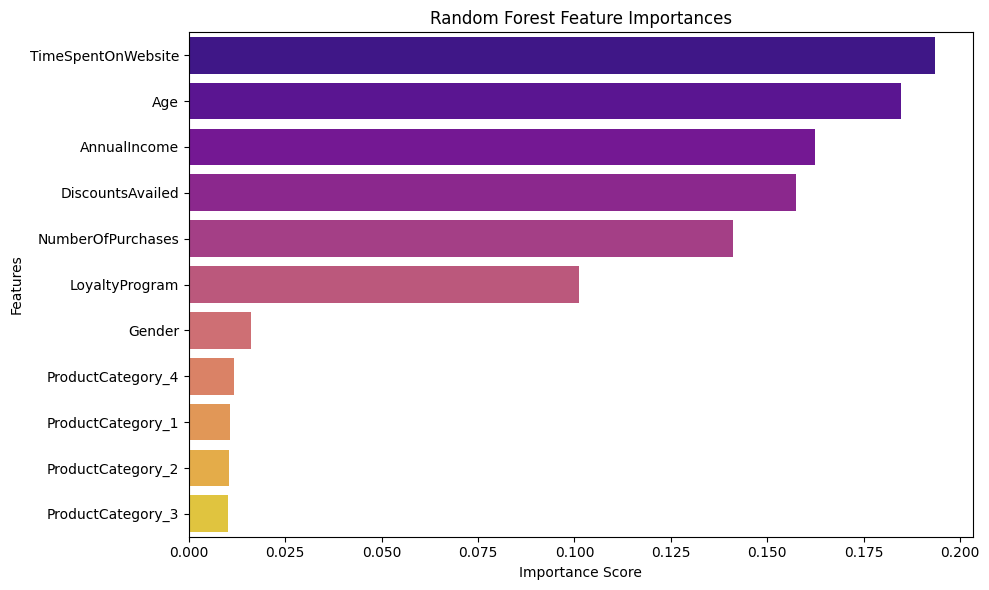

In [39]:
# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette='plasma')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


<ipython-input-40-7712fcc0da72>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='plasma', ax=axes[0])
<ipython-input-40-7712fcc0da72>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_tree, y=feature_importance_tree.index, palette='plasma', ax=axes[1])
<ipython-input-40-7712fcc0da72>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette='plasma', ax=axes[2])


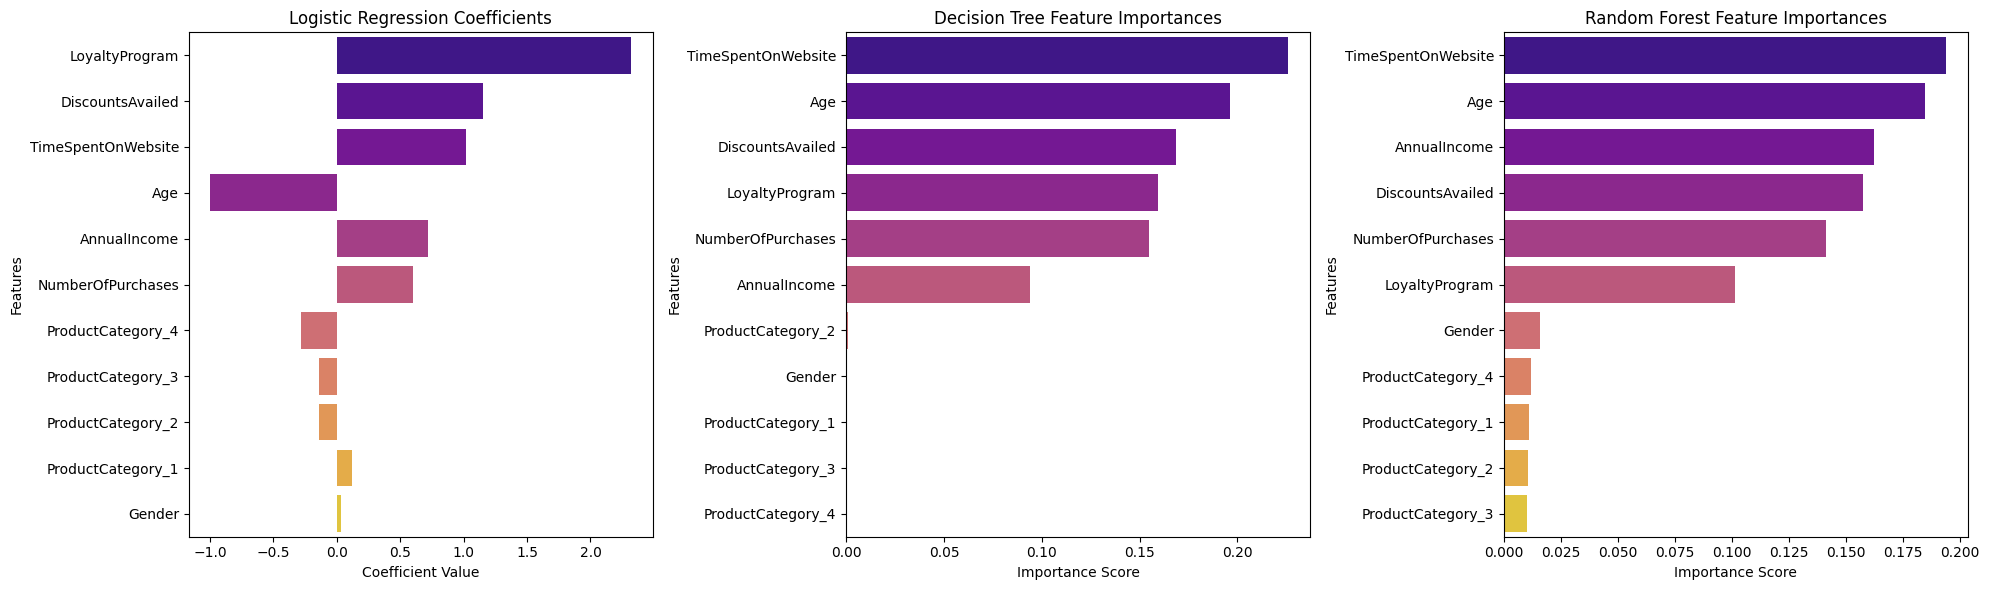

In [40]:
# Plotting the Three Plots Side by Side:

# Set the figure size and number of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot Logistic Regression Coefficients on the first subplot
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='plasma', ax=axes[0])
axes[0].set_title('Logistic Regression Coefficients')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Features')

# Plot Decision Tree Feature Importances on the second subplot
sns.barplot(x=feature_importance_tree, y=feature_importance_tree.index, palette='plasma', ax=axes[1])
axes[1].set_title('Decision Tree Feature Importances')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Features')

# Plot Random Forest Feature Importances on the third subplot
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, palette='plasma', ax=axes[2])
axes[2].set_title('Random Forest Feature Importances')
axes[2].set_xlabel('Importance Score')
axes[2].set_ylabel('Features')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [41]:
# Save the figure as an image (e.g., PNG)
plt.savefig('feature_importances.png', format='png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [42]:
# Download feature_importances.png
from google.colab import files
files.download('feature_importances.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Part 4: Additional Exploration Questions



In [44]:
df_oring

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,20,1,23579,4,2,38,0,5,0
2,27,1,127821,11,2,31,1,0,1
3,24,1,137798,19,3,46,0,4,1
4,31,1,99300,19,1,19,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048,13,0,34,0,5,1
1496,67,1,28775,18,2,17,0,1,1
1497,40,1,57363,7,4,12,0,0,0
1498,63,0,134021,16,2,37,1,0,1


# New df with NO purchases

In [45]:
#New df with no purchases
no_purchase_df = df_oring.loc[df['PurchaseStatus'] == 0]

# Reset the index
no_purchase_df.reset_index(drop=True, inplace=True)

no_purchase_df


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,20,1,23579,4,2,38,0,5,0
1,66,1,37758,14,4,17,0,2,0
2,64,1,39707,13,2,17,1,0,0
3,43,0,102797,20,1,6,0,3,0
4,64,1,31880,17,0,22,1,1,0
...,...,...,...,...,...,...,...,...,...
847,18,1,83126,20,3,2,0,1,0
848,63,0,71874,10,2,43,0,1,0
849,34,1,20418,9,1,54,0,0,0
850,34,1,104649,14,1,28,0,1,0


# New df with YES purchases

In [46]:
#New df with no purchases
yes_purchase_df = df_oring.loc[df['PurchaseStatus'] == 1]

# Reset the index
yes_purchase_df.reset_index(drop=True, inplace=True)

yes_purchase_df


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120,8,0,30,0,5,1
1,27,1,127821,11,2,31,1,0,1
2,24,1,137798,19,3,46,0,4,1
3,31,1,99300,19,1,19,0,0,1
4,39,1,126883,16,3,42,1,4,1
...,...,...,...,...,...,...,...,...,...
643,30,0,71611,20,1,38,0,5,1
644,39,1,65048,13,0,34,0,5,1
645,67,1,28775,18,2,17,0,1,1
646,63,0,134021,16,2,37,1,0,1


In [79]:
yes_purchase_df["TimeSpentOnWebsite"].value_counts().sort_index()

,count
TimeSpentOnWebsite,
1,7
2,8
3,9
4,4
5,10
6,5
7,10
8,3
9,4


<ipython-input-60-995e742f576d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="TimeSpentOnWebsite", palette="magma", ax=axes[0])
<ipython-input-60-995e742f576d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="TimeSpentOnWebsite", palette="magma_r", ax=axes[1])


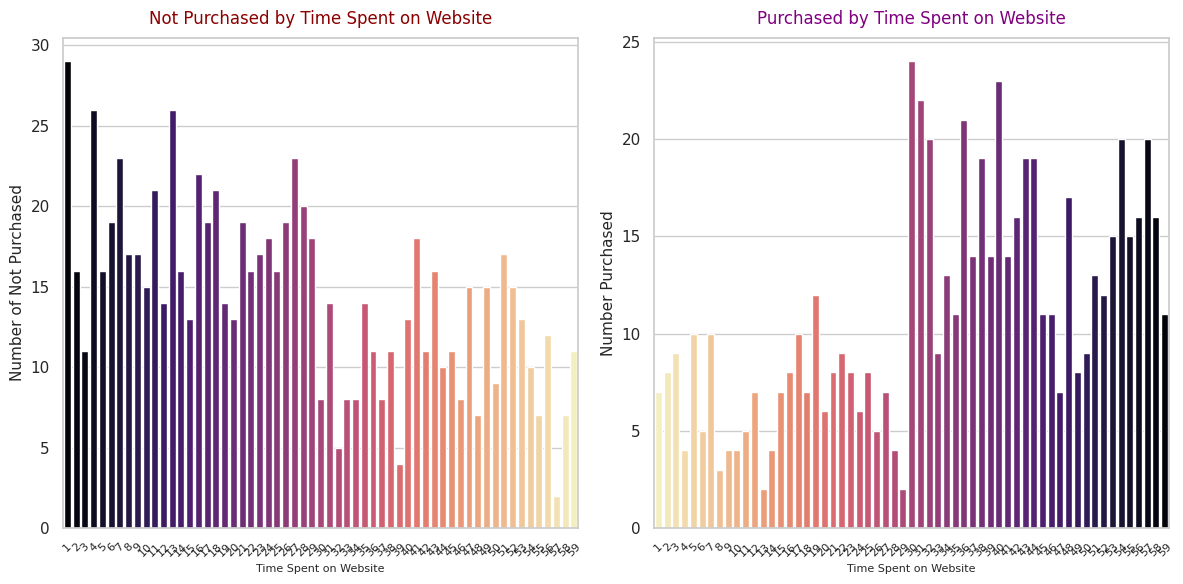

In [60]:
# Purchase Status By TimeSpentOnWebsite Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot: Not Purchased by Age
sns.countplot(data=no_purchase_df, x="TimeSpentOnWebsite", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Time Spent on Website", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Time Spent on Website", fontsize=8)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Age
sns.countplot(data=yes_purchase_df, x="TimeSpentOnWebsite", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Time Spent on Website", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Time Spent on Website", fontsize=8)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-74-9360edda785c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="TimeSpentOnWebsite", palette="magma", ax=axes[0])
<ipython-input-74-9360edda785c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="TimeSpentOnWebsite", palette="magma_r", ax=axes[1])


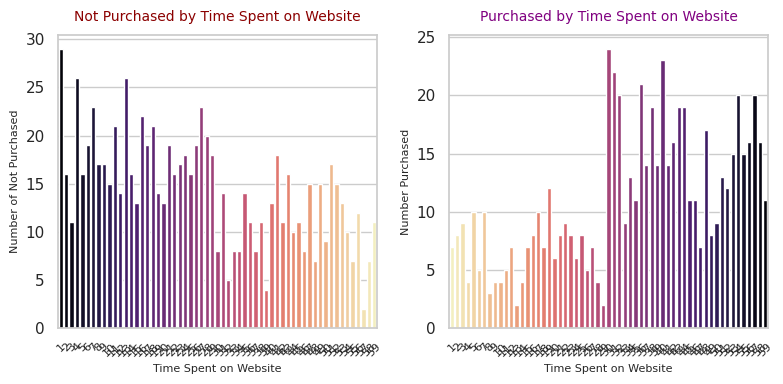

In [74]:
# Purchase Status By TimeSpentOnWebsite Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first count plot: Not Purchased by Age
sns.countplot(data=no_purchase_df, x="TimeSpentOnWebsite", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Time Spent on Website", fontsize=10, color='darkred', pad=10)
axes[0].set_xlabel("Time Spent on Website", fontsize=8)
axes[0].set_ylabel("Number of Not Purchased", fontsize=8)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Age
sns.countplot(data=yes_purchase_df, x="TimeSpentOnWebsite", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Time Spent on Website", fontsize=10, color='purple', pad=10)
axes[1].set_xlabel("Time Spent on Website", fontsize=8)
axes[1].set_ylabel("Number Purchased", fontsize=8)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-73-3c40b1663e2c>:7: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  no_purchase_df["AnnualIncome"].sort_values().plot(
<ipython-input-73-3c40b1663e2c>:7: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  no_purchase_df["AnnualIncome"].sort_values().plot(
<ipython-input-73-3c40b1663e2c>:26: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  yes_purchase_df["AnnualIncome"].sort_values().plot(
<ipython-input-73-3c40b1663e2c>:26: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  yes_purchase_df["AnnualIncome"].sort_values().plot(


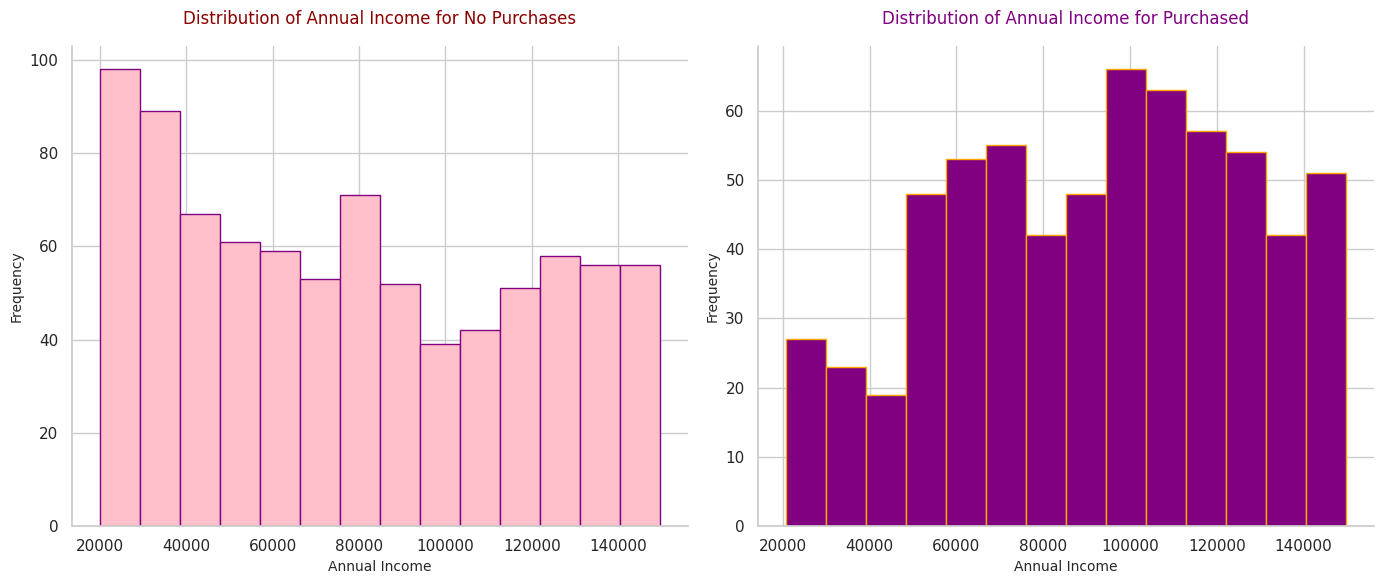

In [73]:
# Purchase Status By AnnualIncome Comparison

# Set up the figure and axes for two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Distribution of Annual Income for No Purchases
no_purchase_df["AnnualIncome"].sort_values().plot(
    kind='hist',
    bins=14,
    color='pink',
    edgecolor='purple',
    cmap='magma',
    title='Distribution of Annual Income for No Purchases',
    ax=axes[0]  # First subplot
)

# Remove the top and right spines for Plot 1
axes[0].spines[['top', 'right']].set_visible(False)

# Add labels and title for Plot 1
axes[0].set_xlabel("Annual Income", fontsize=10)
axes[0].set_ylabel("Frequency", fontsize=10)
axes[0].set_title("Distribution of Annual Income for No Purchases", fontsize=12, color='darkred', pad=16)

# Plot 2: Distribution of Annual Income for Purchased
yes_purchase_df["AnnualIncome"].sort_values().plot(
    kind='hist',
    bins=14,
    color='purple',
    edgecolor='orange',
    cmap='magma',
    title='Distribution of Annual Income for Purchased',
    ax=axes[1]  # Second subplot
)

# Remove the top and right spines for Plot 2
axes[1].spines[['top', 'right']].set_visible(False)

# Add labels and title for Plot 2
axes[1].set_xlabel("Annual Income", fontsize=10)
axes[1].set_ylabel("Frequency", fontsize=10)
axes[1].set_title("Distribution of Annual Income for Purchased", fontsize=12, color='purple', pad=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-58-c85f3dfe92bf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="Age", palette="magma", ax=axes[0])
<ipython-input-58-c85f3dfe92bf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="Age", palette="magma_r", ax=axes[1])


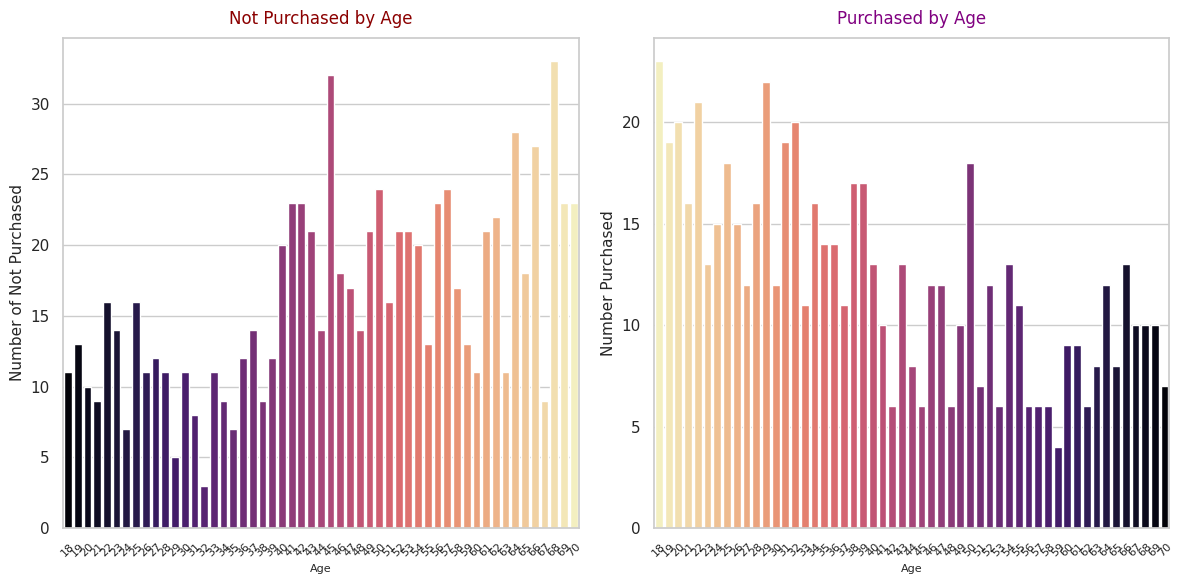

In [58]:
# Purchase Status By Age Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first count plot: Not Purchased by Age
sns.countplot(data=no_purchase_df, x="Age", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Age", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Age", fontsize=8)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Age
sns.countplot(data=yes_purchase_df, x="Age", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Age", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Age", fontsize=8)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-64-3e5f9ee84f4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="NumberOfPurchases", palette="magma", ax=axes[0])
<ipython-input-64-3e5f9ee84f4a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="NumberOfPurchases", palette="magma_r", ax=axes[1])


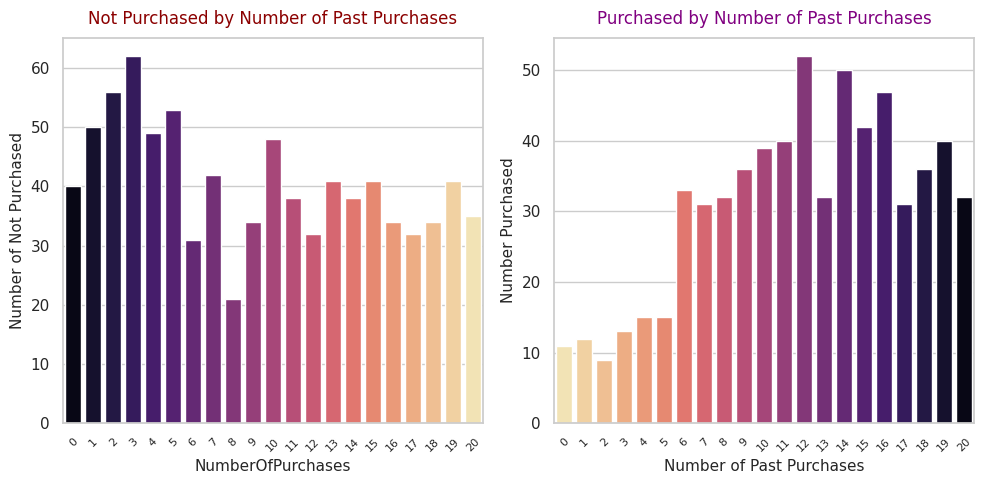

In [64]:
# Purchase Status By Number of Past Purchases Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first count plot: Not Purchased by Number of Past Purchases
sns.countplot(data=no_purchase_df, x="NumberOfPurchases", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Number of Past Purchases", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("NumberOfPurchases", fontsize=11)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Number of Past Purchases
sns.countplot(data=yes_purchase_df, x="NumberOfPurchases", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Number of Past Purchases", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Number of Past Purchases", fontsize=11)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-55-d279a3dc02f4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="DiscountsAvailed", palette="magma", ax=axes[0])
<ipython-input-55-d279a3dc02f4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="DiscountsAvailed", palette="magma_r", ax=axes[1])


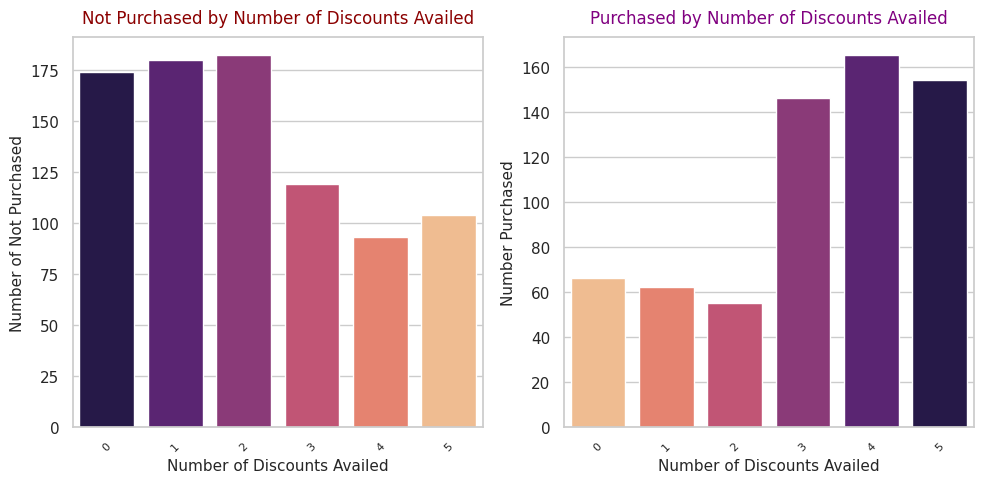

In [55]:
# Purchase Status By Discounts Availed Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first count plot: Not Purchased by Number of Discounts Availed
sns.countplot(data=no_purchase_df, x="DiscountsAvailed", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Number of Discounts Availed", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Number of Discounts Availed", fontsize=11)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Number of Discounts Availed
sns.countplot(data=yes_purchase_df, x="DiscountsAvailed", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Number of Discounts Availed", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Number of Discounts Availed", fontsize=11)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-78-cc38aa61595c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[0])
<ipython-input-78-cc38aa61595c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[1])


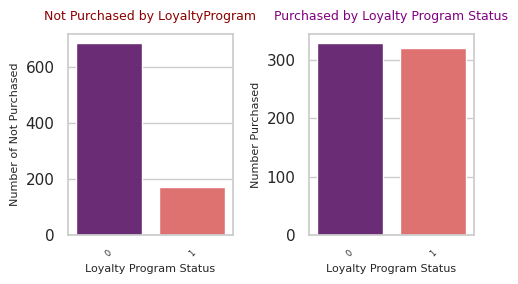

In [78]:
# Purchase Status By Loyalty Program Status

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(5, 3))

# Plot the first count plot: Not Purchased by LoyaltyProgram
sns.countplot(data=no_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by LoyaltyProgram", fontsize=9, color='darkred', pad=10)
axes[0].set_xlabel("Loyalty Program Status", fontsize=8)
axes[0].set_ylabel("Number of Not Purchased", fontsize=8)
axes[0].tick_params(axis='x', rotation=45, labelsize=6)  # Rotate x-ticks

# Plot the second count plot: Purchased by LoyaltyProgram
sns.countplot(data=yes_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[1])
axes[1].set_title("Purchased by Loyalty Program Status", fontsize=9, color='purple', pad=10)
axes[1].set_xlabel("Loyalty Program Status", fontsize=8)
axes[1].set_ylabel("Number Purchased", fontsize=8)
axes[1].tick_params(axis='x', rotation=45, labelsize=6)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-69-7692dfc1cad8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[0])
<ipython-input-69-7692dfc1cad8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[1])


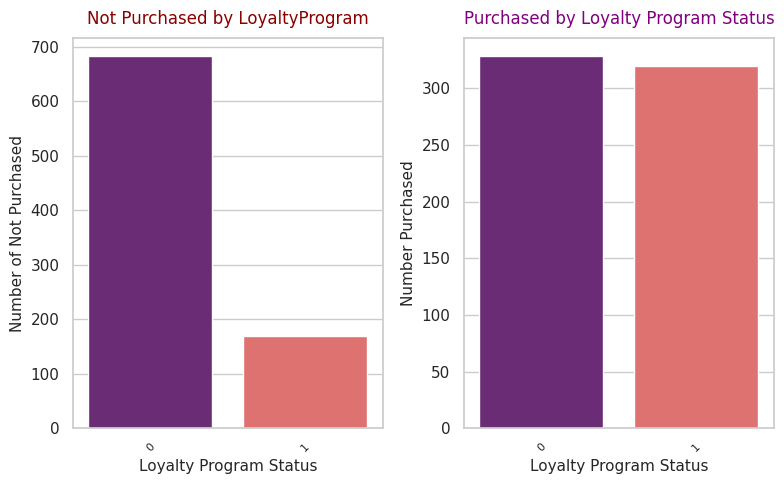

In [69]:
# Purchase Status By Loyalty Program Status

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot the first count plot: Not Purchased by LoyaltyProgram
sns.countplot(data=no_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by LoyaltyProgram", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Loyalty Program Status", fontsize=11)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by LoyaltyProgram
sns.countplot(data=yes_purchase_df, x="LoyaltyProgram", palette="magma", ax=axes[1])
axes[1].set_title("Purchased by Loyalty Program Status", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Loyalty Program Status", fontsize=11)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-68-6d4f7499c4c4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="Gender", palette="magma", ax=axes[0])
<ipython-input-68-6d4f7499c4c4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="Gender", palette="magma", ax=axes[1])


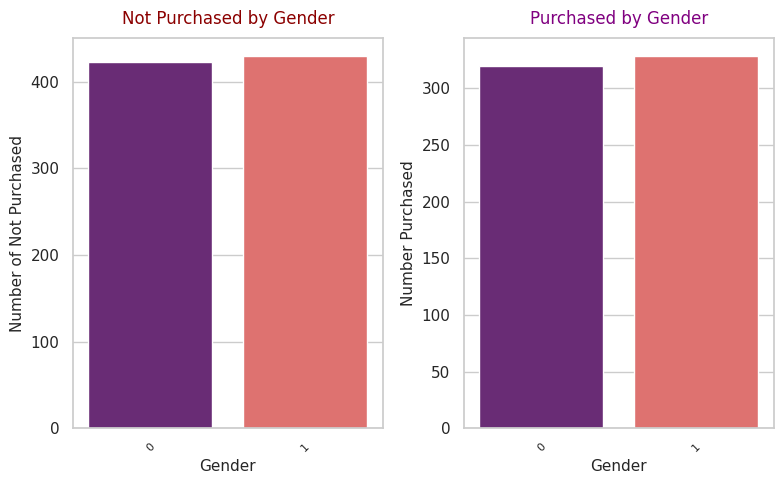

In [68]:
# Purchase Status By Gender Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot the first count plot: Not Purchased by Number of Discounts Availed
sns.countplot(data=no_purchase_df, x="Gender", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Gender", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Gender", fontsize=11)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Number of Discounts Availed
sns.countplot(data=yes_purchase_df, x="Gender", palette="magma", ax=axes[1])
axes[1].set_title("Purchased by Gender", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("Gender", fontsize=11)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-66-751371d52bd4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_purchase_df, x="ProductCategory", palette="magma", ax=axes[0])
<ipython-input-66-751371d52bd4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_purchase_df, x="ProductCategory", palette="magma_r", ax=axes[1])


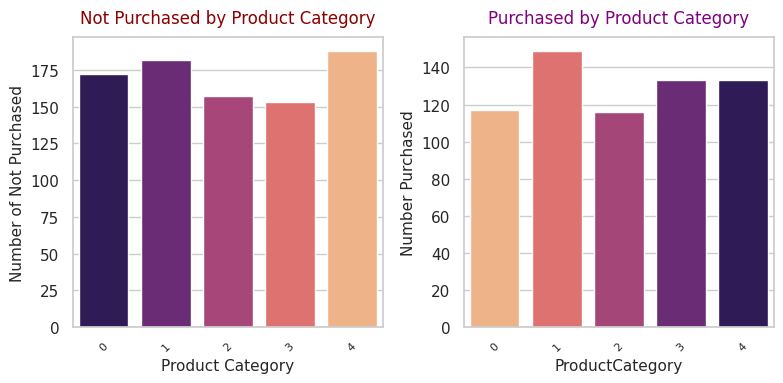

In [66]:
# Purchase Status By Product Category Comparison

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first count plot: Not Purchased by Product Category
sns.countplot(data=no_purchase_df, x="ProductCategory", palette="magma", ax=axes[0])
axes[0].set_title("Not Purchased by Product Category", fontsize=12, color='darkred', pad=10)
axes[0].set_xlabel("Product Category", fontsize=11)
axes[0].set_ylabel("Number of Not Purchased", fontsize=11)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Plot the second count plot: Purchased by Product Category
sns.countplot(data=yes_purchase_df, x="ProductCategory", palette="magma_r", ax=axes[1])
axes[1].set_title("Purchased by Product Category", fontsize=12, color='purple', pad=10)
axes[1].set_xlabel("ProductCategory", fontsize=11)
axes[1].set_ylabel("Number Purchased", fontsize=11)
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-ticks

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
